# Classified Data learning Project:
We have a classified data set from a company! They've hidden the feature column names but have given the data and the target classes. 

I am using KNN to create a model that directly predicts a class for a new data point based off of the features.


## Importing Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Getting Data

In [2]:
df=pd.read_csv('Classified Data', index_col=0)   

#Index col=0 will drop an extra index column so present in data set..we already have diff methods for the same...i.e. drop 

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
ss = StandardScaler()

In [6]:
scaled_array=ss.fit_transform(df.drop('TARGET CLASS', axis=1))

In [7]:
scaled_array.shape

(1000, 10)

In [8]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [9]:
X=pd.DataFrame(data=scaled_array, columns=df.columns[:-1])

In [10]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
WTT    1000 non-null float64
PTI    1000 non-null float64
EQW    1000 non-null float64
SBI    1000 non-null float64
LQE    1000 non-null float64
QWG    1000 non-null float64
FDJ    1000 non-null float64
PJF    1000 non-null float64
HQE    1000 non-null float64
NXJ    1000 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


In [12]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
y=df['TARGET CLASS']

In [14]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

## Training and testing the data

Split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_array,df['TARGET CLASS'],
                                                    test_size=0.30)

## Creating and Training the Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model=KNeighborsClassifier(n_neighbors=1)

In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
ypred=model.predict(X_test)

In [21]:
# Checking for k=1 , ACCURACY TEST( similar to confusion matrix)

y_test==ypred

971     True
868     True
410     True
284    False
532     True
982     True
272     True
919     True
124     True
814     True
67      True
667     True
664     True
862     True
846     True
932     True
85      True
867    False
604     True
359     True
516     True
984     True
300     True
430     True
268     True
233     True
546     True
188     True
620     True
808     True
       ...  
884     True
776     True
416     True
217     True
356     True
216     True
909     True
149    False
717     True
592     True
635     True
478     True
588     True
617     True
583     True
415     True
476     True
798     True
402     True
291     True
6      False
442     True
88      True
136     True
92      True
24      True
380     True
42      True
913     True
454     True
Name: TARGET CLASS, Length: 300, dtype: bool

In [22]:
# Checking for k=1 , ACCURACY TEST( similar to confusion matrix)


y_test!=ypred

971    False
868    False
410    False
284     True
532    False
982    False
272    False
919    False
124    False
814    False
67     False
667    False
664    False
862    False
846    False
932    False
85     False
867     True
604    False
359    False
516    False
984    False
300    False
430    False
268    False
233    False
546    False
188    False
620    False
808    False
       ...  
884    False
776    False
416    False
217    False
356    False
216    False
909    False
149     True
717    False
592    False
635    False
478    False
588    False
617    False
583    False
415    False
476    False
798    False
402    False
291    False
6       True
442    False
88     False
136    False
92     False
24     False
380    False
42     False
913    False
454    False
Name: TARGET CLASS, Length: 300, dtype: bool

In [23]:
np.mean(y_test!=ypred) 

0.08333333333333333

In [24]:
# For a certain no. of k-values:

error_rate=[]   # empty list that will save  error rate
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))

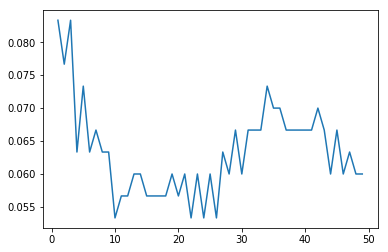

In [25]:
# Seeing error_rate individually is a challenge, hence we plot and visualise the same:
plt.plot(range(1,50), error_rate)

## Predictions and Evaluations

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,ypred))

[[156  14]
 [  4 126]]


In [28]:
print(classification_report(y_test,ypred))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95       170
          1       0.90      0.97      0.93       130

avg / total       0.94      0.94      0.94       300



Since Precision and recall are good, hence our model is good!!